# 20) Visualization with Matplotlib

*This notebook contains excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the original content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

## Summary

Visualization is a powerful tool for understanding and communication. You could take [entire courses](https://www.si.umich.edu/programs/courses/649) in theory and methods of visualization, which I would find fascinating to do, but this is not that course. Today, we'll simply introduce:

- Some inspiration for making beautiful, effective visualizations
- A bit of color theory that every scientist should know
- A walk-through of some how-to's in Python's Matplotlib 

## A wee bit of inspiration

- https://matplotlib.org/gallery/index.html
- https://seaborn.pydata.org/examples/index.html

## A wee bit of color theory

From https://betterfigures.org/2015/06/23/picking-a-colour-scale-for-scientific-graphics/:
![No rainbows](images/lect20_spectrum-vs-cubeyf.png)

A nice article with some quick tips for us: ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

Scientific visualization as "graphical interface between people and data"

### Rule 1: Know Your Audience
![For public](images/lect20_for_public.png)

### Rule 2: Identify Your Message

Don't develop your figure until you identify the message you want to convey: "If your figure is able to convey a striking message at first glance, chances are increased that your article will draw more attention from the community." 

### Rule 3: Adapt the Figure to the Support Medium

![Diff versions for different media](images/lect20_paper_v_talk.png)

### Rule 4: Captions Are Not Optional

Did the last image convey all needed information? How about with this caption? "These two figures represent the same simulation of the trajectories of a dual-particle system ... where each particle interacts with the other. Depending on the initial conditions, the system may end up in three different states. The left figure has been prepared for a journal article where the reader is free to look at every detail. The red color has been used consistently to indicate both initial conditions (red dots in the zoomed panel) and trajectories (red lines). Line transparency has been increased in order to highlight regions where trajectories overlap (high color density). The right figure has been prepared for an oral presentation. Many details have been removed (reduced number of trajectories, no overlapping trajectories, reduced number of ticks, bigger axis and tick labels, no title, thicker lines)
because the time-limited display of this figure would not allow for the audience to scrutinize every detail. Furthermore, since the figure will be described during
the oral presentation, some parts have been modified to make them easier to reference (e.g., the yellow box, the red dashed line)."

#### Further guidance:

- "If the numeric values are important, they must be provided elsewhere in your article or be written very clearly on the figure."
- "Similarly, if there is a point of interest in the figure..., make sure it is visually distinct but do not hesitate to point it out again in the caption.

### Rule 5: Do Not Trust the Defaults

"[Default settings] are good enough for any plot but they are best for none."

![Defaults](images/lect20_defaults.png)

### Rule 6: Use Color Effectively

- If there is no need for color, keep the figure black, or grayscale
- **Never** use a default colormap like 'jet' or 'rainbow'

Types of scientifically-sound colormaps and when to use them:

- *Sequential:* one variation of a unique color, used for quantitative data varying from low to high.
- *Diverging:* variation from one color to another, used to highlight deviation from a median value.
- *Qualitative:* rapid variation of colors, used mainly for discrete or categorical data.

Let's play with some nice color palates, courtesy of [ColorBrewer](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)!

### Rule 7: Do Not Mislead the Reader

It can be difficult to objectively display data. For example:

- Pay attention to your axes; are the scales the same and start at zero? If not, why? And if not, do you call attention to this?
- Pie charts and 3-D charts are known to induce an incorrect perception of quantities

![Defaults](images/lect20_no_lies.png)

### Rule 8: Avoid ‘‘Chartjunk’’

"Chartjunk refers to all the unnecessary or confusing visual elements found in a figure that do not improve the message (in the best case) or add confusion (in the worst case)"

![Chartjunk](images/lect20_chartjunk.png)

### Rule 9: Message Above Beauty

Feel free to be inspired by images you've seen and liked, but don't directly copy them due to 1) copyright, and 2) it is unlikely that you are trying to send the same message as the original, and you need your message to direct the form.

### Rule 10: Get the Right Tool

First on the list of open-source tools is Matplotlib, which we'll discuss today. The article notes that all the graphics in it were created with Matplotlib, and figure scripts are available at https://github.com/rougier/ten-rules

## On to Matplotlib!

### Fun facts

Matplotlib was originally written as a Python alternative for MATLAB users.  
Matplotlib took off after the Hubble Telescope folks adopted it and financially supported it to expand its capabilities. It is now the go-to plotting tool in python. 

### Importing and shorthand

As usual, the very popular libraries have standard alias used in the community. The `matplotlib.pyplot` is what we'll use most (and have already used). 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

It is possible to customize style sheets. For now, we'll use the classic style:

In [2]:
plt.style.use('classic')

In my programs & projects, I usually save images rather than display them (see https://github.com/team-mayes/arthritis_proj_demo). For our notebooks, we'll want to display our plots "inline", so we'll add the command:

In [3]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic, e.g.:

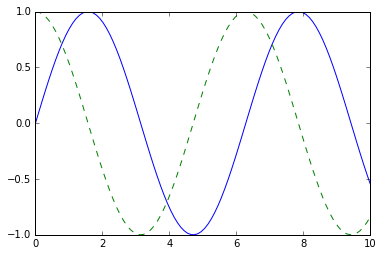

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)  # note this line--very helpful for setting up plotting!

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

We can also save it, as we did in the arthritis_project:

In [5]:
fig.savefig('examples/my_figure.png')

The extension told python what format we wanted for the image. Other options are:

In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

### Matlab-like syntax

Those who use MATLAB: does this syntax look familiar?

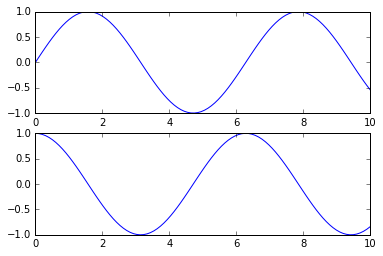

In [7]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. To re-create the previous plot using this style of plotting, you might do the following:

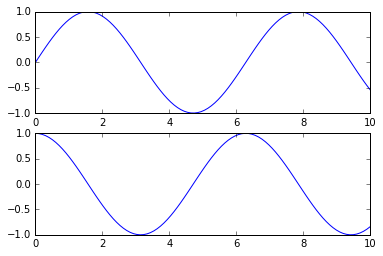

In [8]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.

### Simple Line Plots

This time, we'll use a different style (my favorite):

In [9]:
plt.style.use('seaborn-whitegrid')

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:


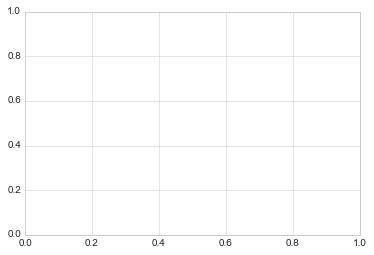

In [10]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. We'll commonly use the variable name fig to refer to a figure instance, and ax to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ax.plot function to plot some data. Let's start with a simple sinusoid:


In [11]:
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us:

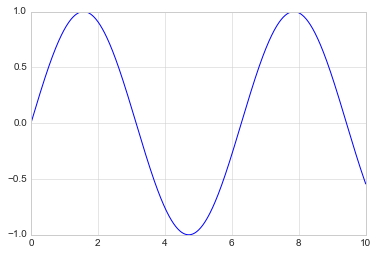

In [12]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the plot function multiple times. Here, no colors are specified, so Matplotlib will automatically cycle through a set of default colors for multiple lines.

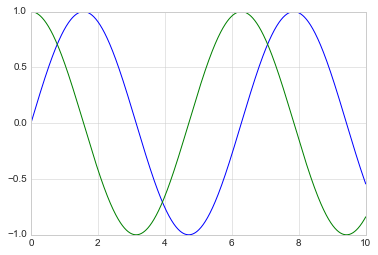

In [13]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Adjusting the Plot: Line Colors and Styles

The plt.plot() function takes additional arguments that can be used to specify these. To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways:

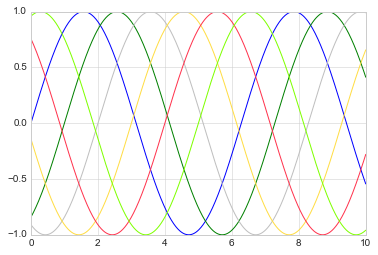

In [14]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Similarly, the line style can be adjusted using the `linestyle` keyword:

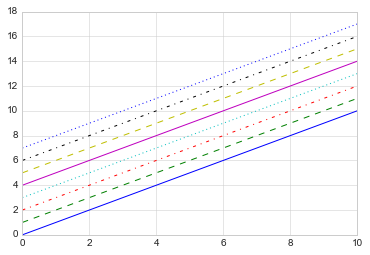

In [15]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

These `linestyle` and `color` codes can be combined into a single non-keyword argument to the plt.plot() function:

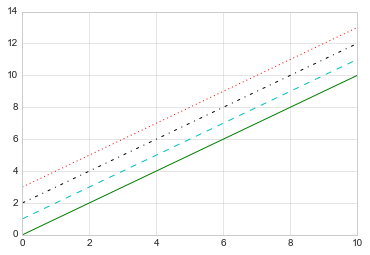

In [16]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Many more options are available in the [matplotlib.pyplot.plot documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

### Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

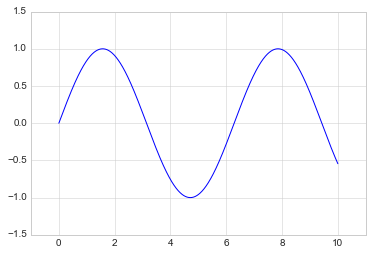

In [17]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:


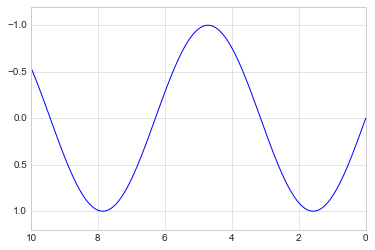

In [18]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is plt.axis() (note here the potential confusion between axes with an e, and axis with an i). The plt.axis() method allows you to set the x and y limits with a single call, by passing a list which specifies [xmin, xmax, ymin, ymax]:


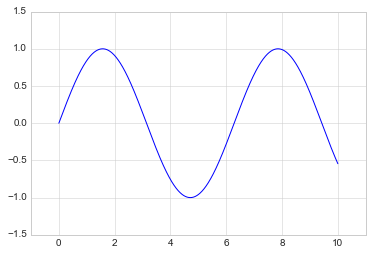

In [19]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

A neat option that adjusts scales in x and y so that on your screen, one unit in x is equal to one unit in y:

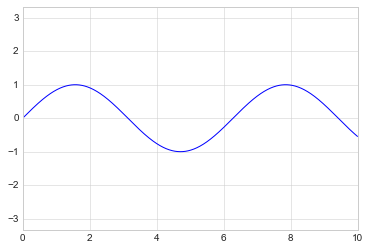

In [20]:
plt.plot(x, np.sin(x))
plt.axis('equal');

### Labeling Plots: Always a good idea!!!!

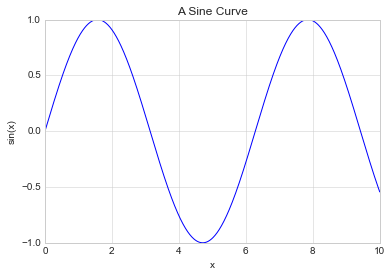

In [21]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

Of course, legends are great for when there are multiple lines:

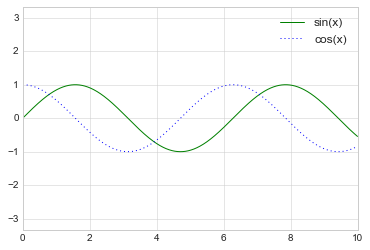

In [22]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

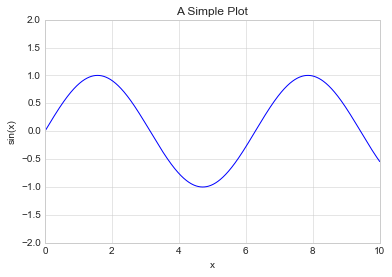

In [23]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## Simple Scatter Plots

The difference from line plots is that we'll have more spaced-out data, and instead of specifying line types, we'll specify marker types:

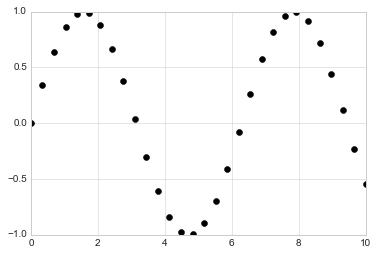

In [24]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

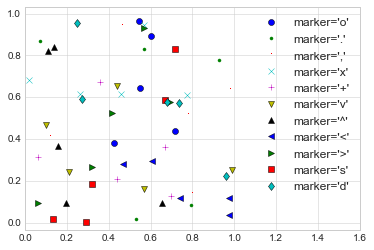

In [25]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.axis('equal')
plt.legend()
plt.xlim(0, 1.6);

You can specify a line style and marker to get both:

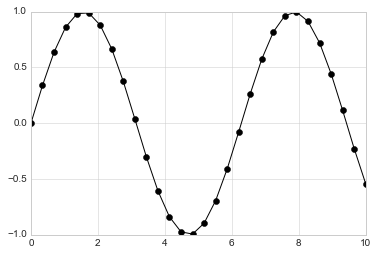

In [26]:
plt.plot(x, y, '-ok');

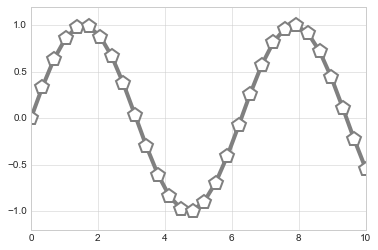

In [27]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

### Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

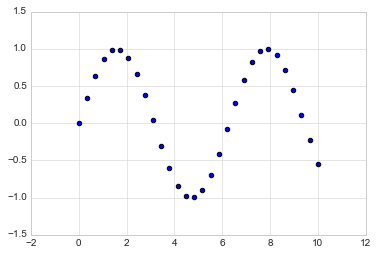

In [28]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

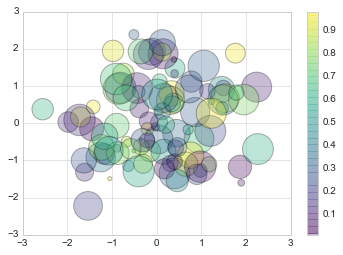

In [29]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

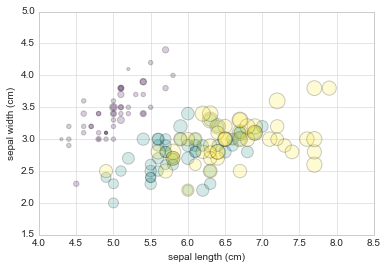

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

### ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

## Visualizing Error

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

### Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

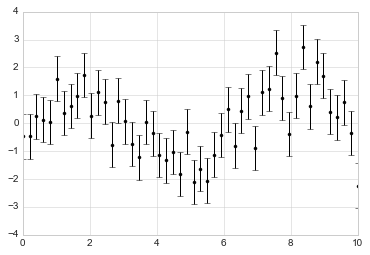

In [31]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``.

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

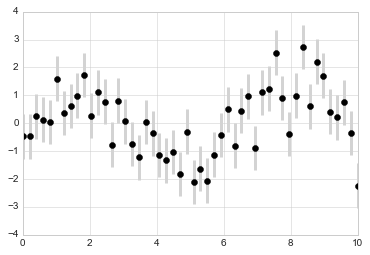

In [32]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars (xerr), one-sided errorbars, and many other variants. For more information on the options available, refer to the documentation of of [plt.errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html).


## Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

### Visualizing a Three-Dimensional Function

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$:

In [33]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

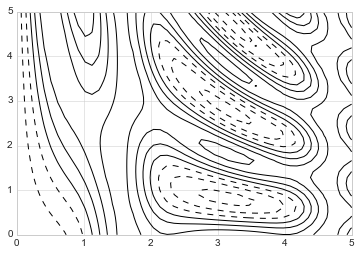

In [34]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# a standard line-only contour plot
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

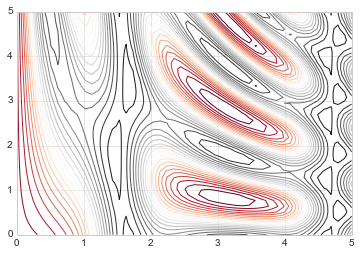

In [35]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

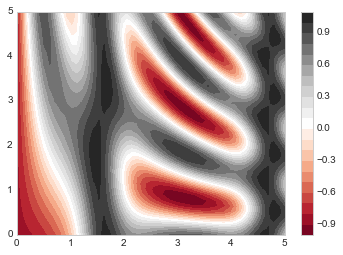

In [36]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

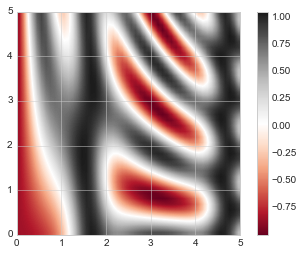

In [37]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

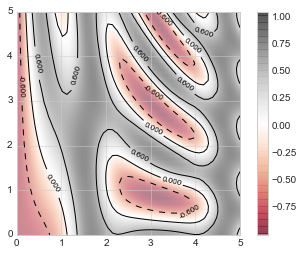

In [38]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—``plt.contour``, ``plt.contourf``, and ``plt.imshow``—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.

## Histograms, Binnings, and Density

A basic histogram can be plotted in one line after the data is loaded:

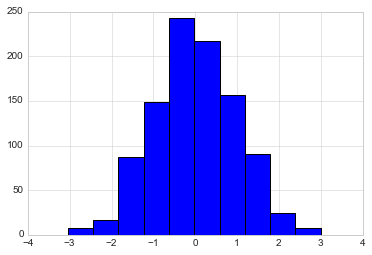

In [39]:
data = np.random.randn(1000)
plt.hist(data);

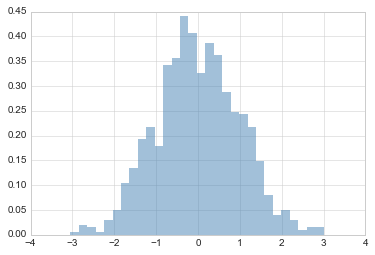

In [40]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The [`plt.hist` documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) has more information on other customization options available. I find this combination of `histtype='stepfilled'` along with some transparency `alpha` to be very useful when comparing histograms of several distributions:

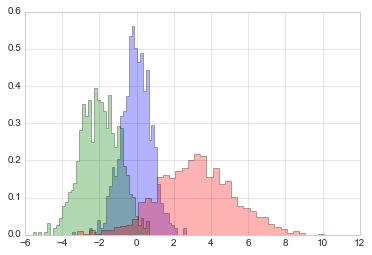

In [41]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the `np.histogram()` function is available:

In [42]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 25 236 460 247  32]


### Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. We'll take a brief look at several ways to do this here. We'll start by defining some data—an x and y array drawn from a multivariate Gaussian distribution:

In [43]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### `plt.hist2d`: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function:

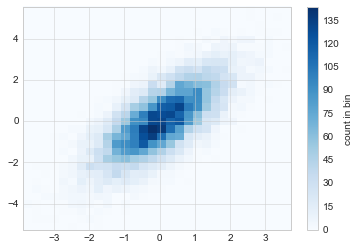

In [44]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('count in bin')

Just as with `plt.hist`, [`plt.hist2d`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html#matplotlib.pyplot.hist2d) has a number of extra options to fine-tune the plot and the binning. Further, just as `plt.hist` has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`, which can be used as follows:

In [45]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the `np.histogramdd` function.


#### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

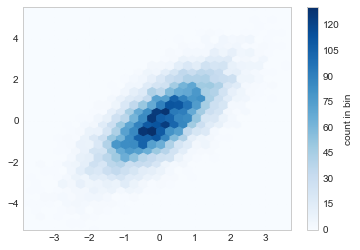

In [46]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

## Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

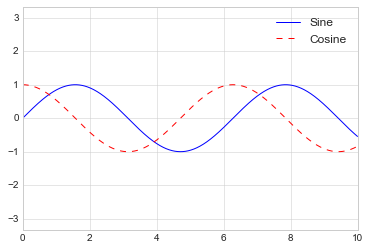

In [47]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

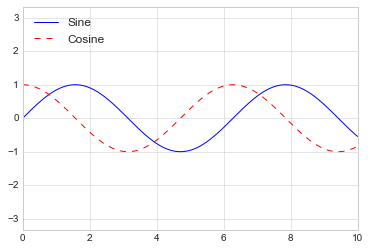

In [48]:
ax.legend(loc='upper left', frameon=False)
fig

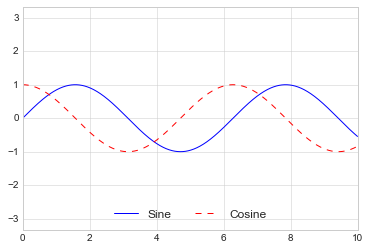

In [49]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

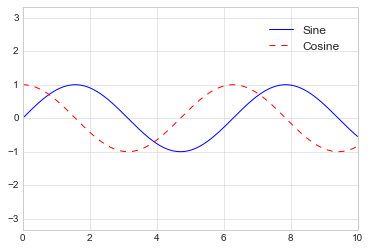

In [50]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Choosing Elements for the Legend

As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

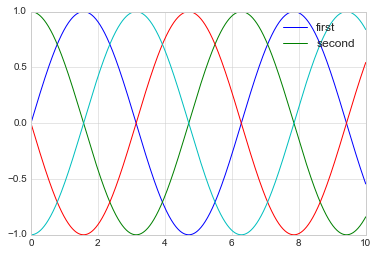

In [51]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

It is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

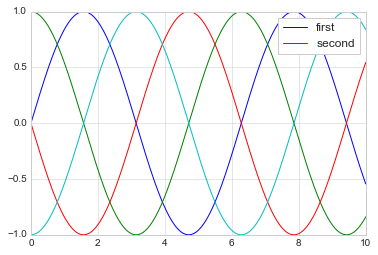

In [52]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Notice that by default, the legend ignores all elements without a ``label`` attribute set.

### Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

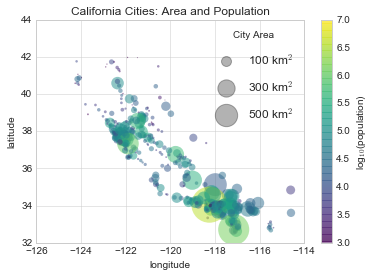

In [53]:
import pandas as pd
cities = pd.read_csv('examples/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

Finally, note that for geographic data like this, it would be clearer if we could show state boundaries or other map-specific elements. We'll come back to this!

### Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level [``ax.add_artist()``](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.add_artist.html) method to manually add the second artist to the plot:

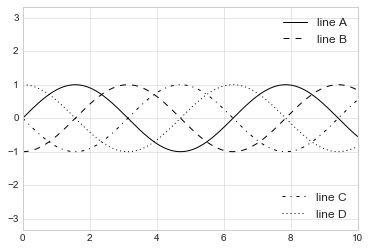

In [54]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.

As we have seen, the simplest colorbar can be created with the ``plt.colorbar`` function:

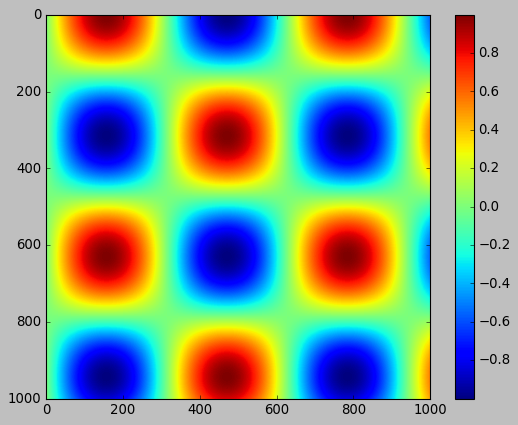

In [55]:
plt.style.use('classic')
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

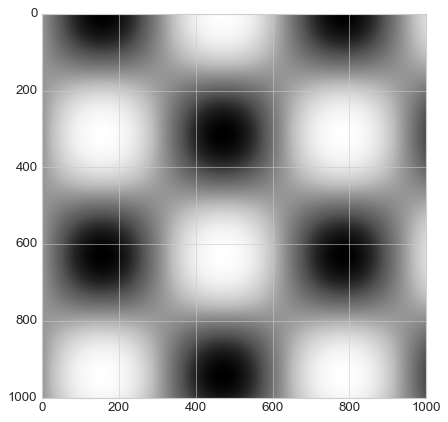

In [56]:
plt.style.use('seaborn-whitegrid')
plt.imshow(I);

## Customizing Colorbars

We can also specify the colormap using the ``cmap`` argument to the plotting function that is creating the visualization:

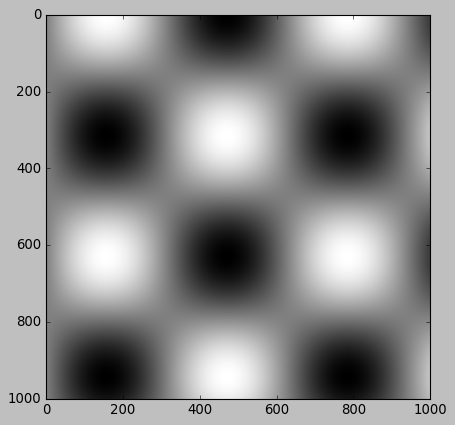

In [57]:
plt.style.use('classic')
plt.imshow(I, cmap='gray');

In [58]:
plt.style.use('seaborn-whitegrid')

All the available colormaps are in the ``plt.cm`` namespace; using IPython's tab-completion will give you a full list of built-in possibilities:
```
plt.cm.<TAB>
```
But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

### Choosing the Colormap

A full treatment of color choice within visualization is beyond the scope of this class, but there are many additional resources that will talk about colormap choice, including

Matplotlib's online documentation also has an [interesting discussion](http://Matplotlib.org/1.4.1/users/colormaps.html) of colormap choice.

Broadly, you should be aware of three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., ``binary`` or ``viridis``).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., ``RdBu`` or ``PuOr``).
- *Qualitative colormaps*: these mix colors with no particular sequence (e.g., ``rainbow`` or ``jet``).

The ``jet`` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the ``jet`` colorbar into black and white:

In [59]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

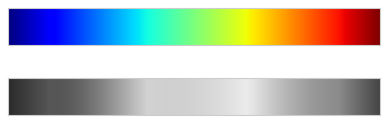

In [60]:
view_colormap('jet')

Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as ``viridis`` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range.
Thus it not only plays well with our color perception, but also will translate well to grayscale printing:

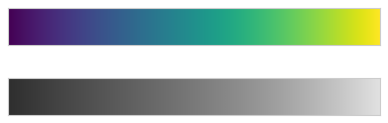

In [61]:
view_colormap('viridis')

If you favor rainbow schemes, another good option for continuous data is the ``cubehelix`` colormap:

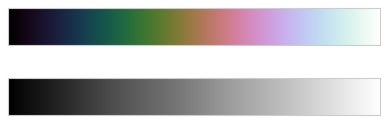

In [62]:
view_colormap('cubehelix')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as ``RdBu`` (*Red-Blue*) can be useful. However, as you can see in the following figure, it's important to note that the positive-negative information will be lost upon translation to grayscale!

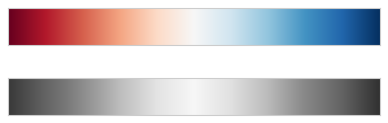

In [63]:
view_colormap('RdBu')

We'll see examples of using some of these color maps as we continue.

### Color limits and extensions

Matplotlib allows for a large range of colorbar customization.
The colorbar itself is simply an instance of ``plt.Axes``, so all of the axes and tick formatting tricks we've learned are applicable.
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the ``extend`` property.
This might come in handy, for example, if displaying an image that is subject to noise:

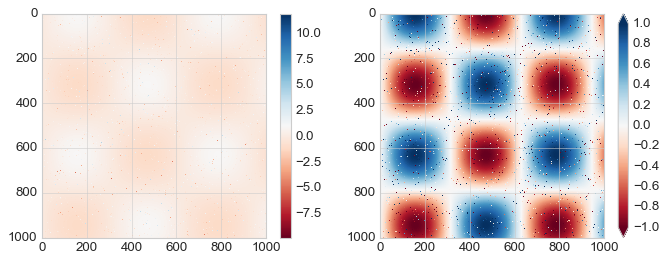

In [64]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.
In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits.
The result is a much more useful visualization of our data.

### Discrete Color Bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins:

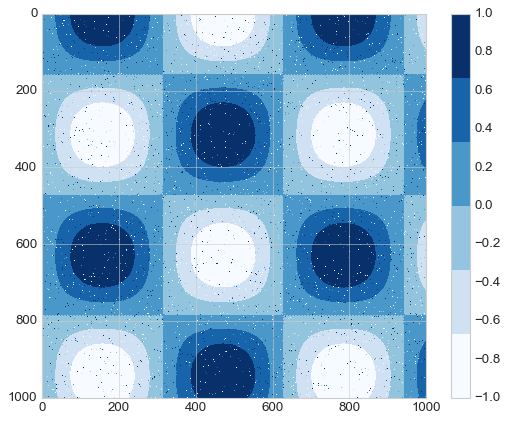

In [65]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

The discrete version of a colormap can be used just like any other colormap.

## Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

### ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

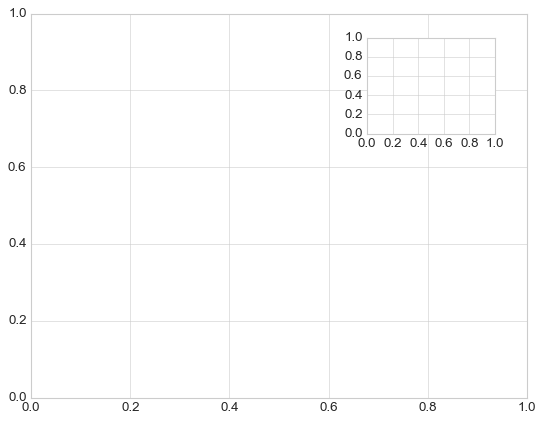

In [66]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

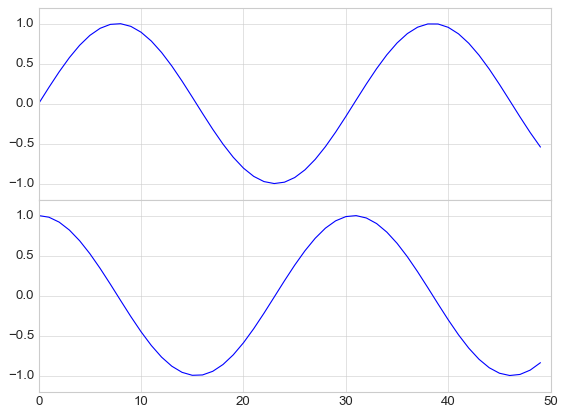

In [67]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes that are just touching.

## ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

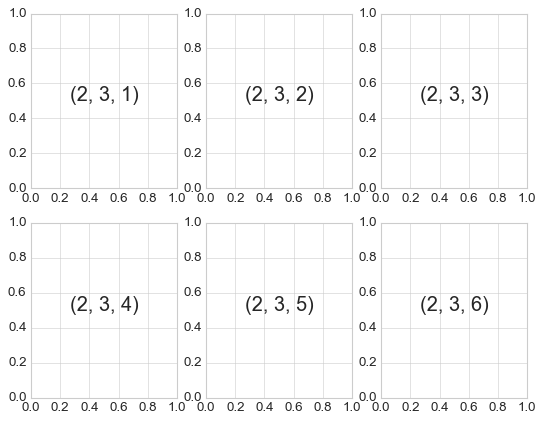

In [68]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

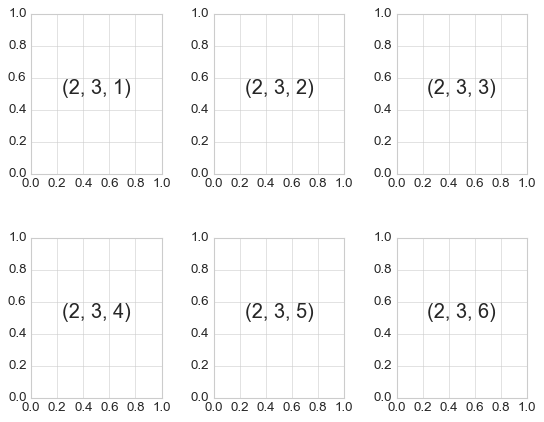

In [69]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

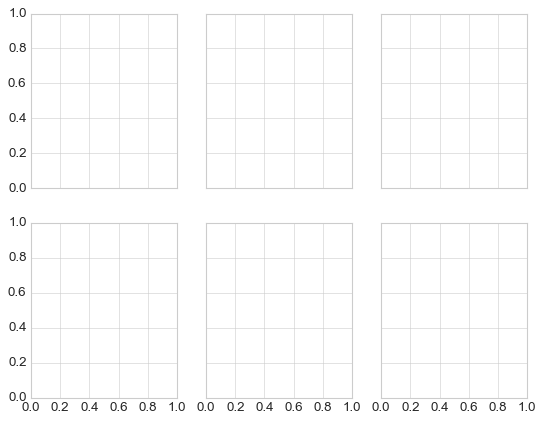

In [70]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

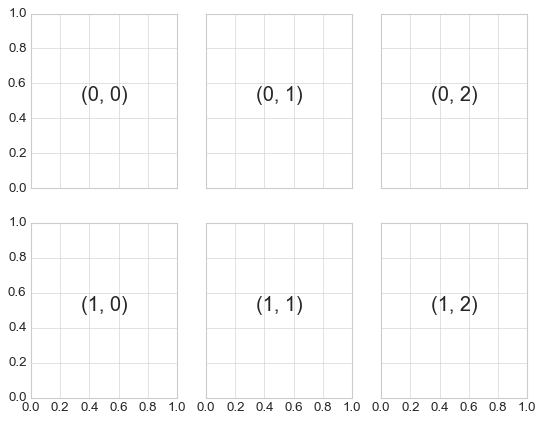

In [71]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

## ``plt.GridSpec``: More Complicated Arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.
For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

In [72]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using the familiar Python slicing syntax:

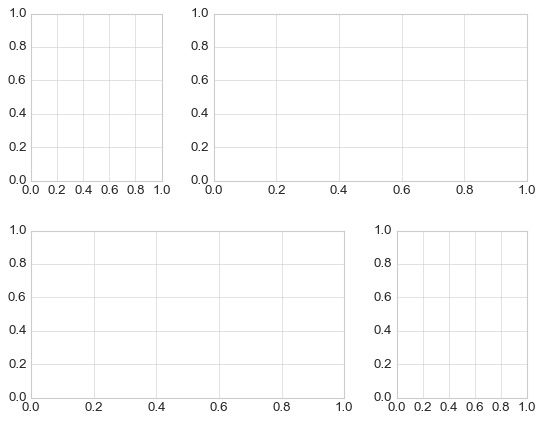

In [73]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

This type of flexible grid alignment has a wide range of uses, such as when creating multi-axes histogram plots like the ones shown here:

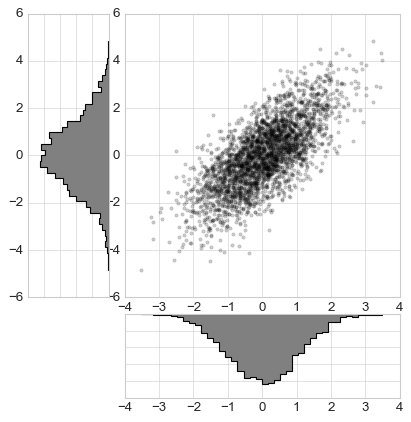

In [74]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

This type of distribution plotted alongside its margins is common enough that it has its own plotting API in the Seaborn package (more on that to come).

## Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story.
In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.
Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.
Let's take a look at some data and how we might visualize and annotate it to help convey interesting information.

## Example: Effect of Holidays on US Births

Let work with data from https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv (saved under examples/births.csv on our github).

We'll start with the same cleaning procedure we used there, and plot the results:

In [75]:
births = pd.read_csv('examples/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

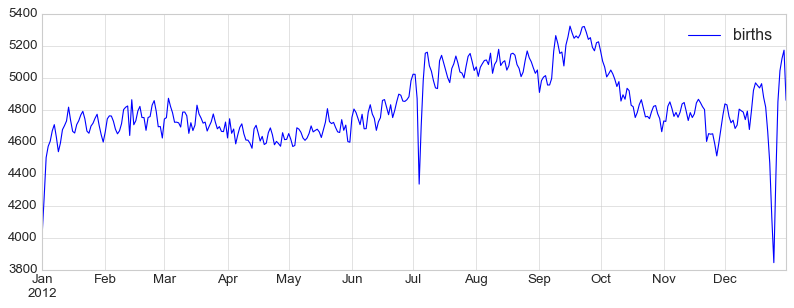

In [76]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the ``plt.text``/``ax.text`` command, which will place text at a particular x/y value:

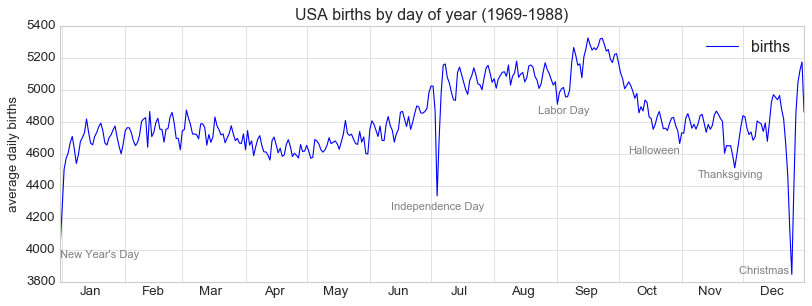

In [77]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.
See the docstring of ``plt.text()`` and of ``mpl.text.Text()`` for more information on available options.

## Transforms and Text Position

In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the *transform*.

Any graphics display framework needs some scheme for translating between coordinate systems.
For example, a data point at $(x, y) = (1, 1)$ needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen.
Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (these tools can be explored in the ``matplotlib.transforms`` submodule).

The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

- ``ax.transData``: Transform associated with data coordinates
- ``ax.transAxes``: Transform associated with the axes (in units of axes dimensions)
- ``fig.transFigure``: Transform associated with the figure (in units of figure dimensions)

Here let's look at an example of drawing text at various locations using these transforms:

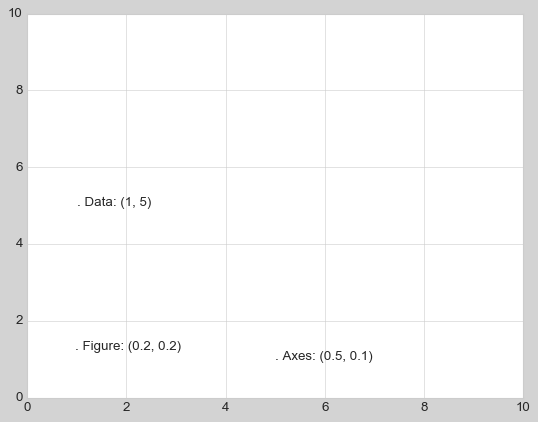

In [78]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location.

The ``transData`` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The ``transAxes`` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size.
The ``transFigure`` coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

Notice now that if we change the axes limits, it is only the ``transData`` coordinates that will be affected, while the others remain stationary:

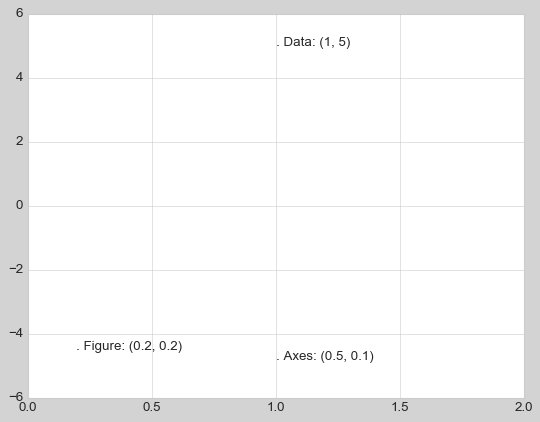

In [79]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation

Along with tick marks and text, another useful annotation mark is the simple arrow.

Drawing arrows in Matplotlib is often much harder than you'd bargain for.
While there is a ``plt.arrow()`` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended.
Instead, I'd suggest using the ``plt.annotate()`` function.
This function creates some text and an arrow, and the arrows can be very flexibly specified.

Here we'll use ``annotate`` with several of its options:

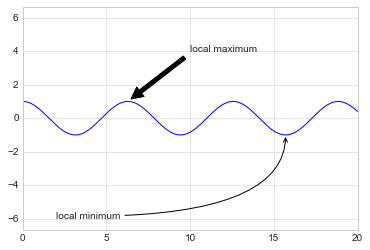

In [80]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the ``arrowprops`` dictionary, which has numerous options available.
These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities.
Let's demonstrate several of the possible options using the birthrate plot from before:

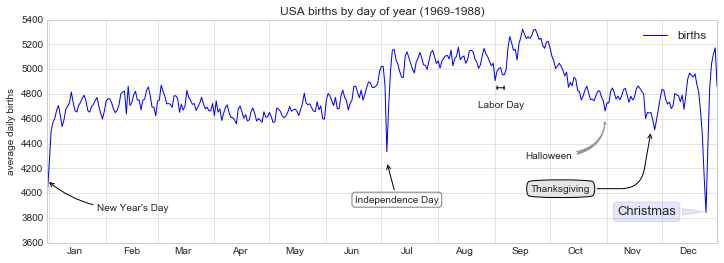

In [81]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.

More discussion and examples of available arrow and annotation styles can be found in the Matplotlib gallery, in particular the [Annotation Demo](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html).

## Customizing Ticks

Matplotlib's default tick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. This section will give several examples of adjusting the tick locations and formatting for the particular plot type you're interested in.

Before we go into examples, it will be best for us to understand further the object hierarchy of Matplotlib plots.
Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the ``figure`` is the bounding box within which plot elements appear.
Each Matplotlib object can also act as a container of sub-objects: for example, each ``figure`` can contain one or more ``axes`` objects, each of which in turn contain other objects representing plot contents.

The tick marks are no exception. Each ``axes`` has attributes ``xaxis`` and ``yaxis``, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.

### Major and Minor Ticks

Within each axis, there is the concept of a *major* tick mark, and a *minor* tick mark. As the names would imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks. Whether they show up or not will depend on which style and options you use. For example, They will show on log plots if you use the 'classic' style, but not the 'seaborn-whitegrid' style.

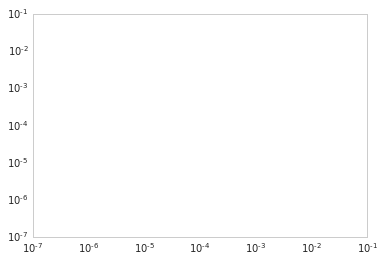

In [82]:
ax = plt.axes(xscale='log', yscale='log')
plt.style.use('classic')
ax.set_xlim(1e-7, 0.1)
ax.set_ylim(1e-7, 0.1)
ax.grid();

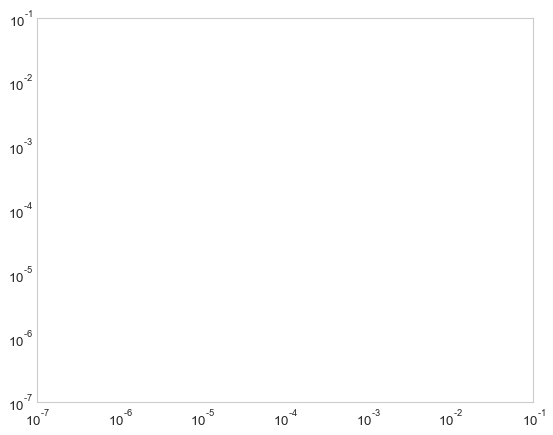

In [83]:
plt.style.use('seaborn-whitegrid')
ax = plt.axes(xscale='log', yscale='log')
ax.set_xlim(1e-7, 0.1)
ax.set_ylim(1e-7, 0.1)
ax.grid();

No worries of course--we can always specify what we want! Tick properties—locations and labels—that is, can be customized by setting the ``formatter`` and ``locator`` objects of each axis. Let's examine these for the x axis of the just shown plot:

In [84]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [85]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

We'll now show a few examples of setting these locators and formatters for various plots.

## Hiding Ticks or Labels

Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using ``plt.NullLocator()`` and ``plt.NullFormatter()``, as shown here:

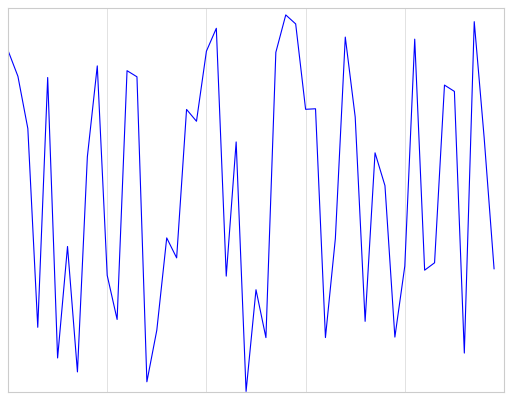

In [86]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Notice that we've removed the labels (but kept the ticks/gridlines) from the x axis, and removed the ticks (and thus the labels as well) from the y axis.
Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.
For instance, consider the following figure, which includes images of different faces, an example often used in supervised machine learning problems:

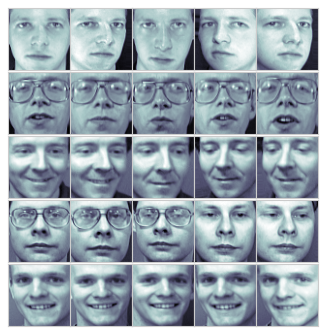

In [87]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

Notice that each image has its own axes, and we've set the locators to null because the tick values (pixel number in this case) do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up with crowded labels.
We can see this in the plot grid shown here:

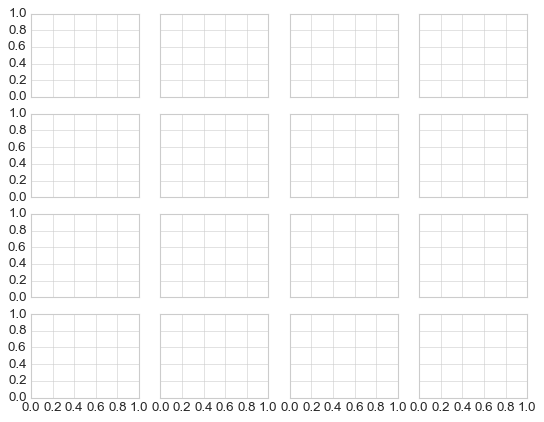

In [88]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Particularly for the x ticks, the numbers nearly overlap and make them quite difficult to decipher.
We can fix this with the ``plt.MaxNLocator()``, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

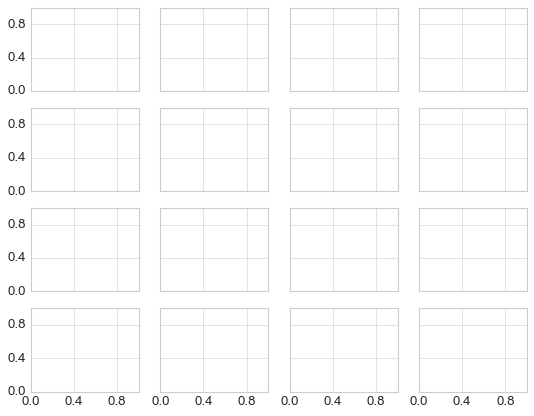

In [89]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

This makes things much cleaner. If you want even more control over the locations of regularly-spaced ticks, you might also use ``plt.MultipleLocator``, which we'll discuss in the following section.

## Fancy Tick Formats

Matplotlib's default tick formatting can leave a lot to be desired: it works well as a broad default, but sometimes you'd like do do something more.
Consider this plot of a sine and a cosine:

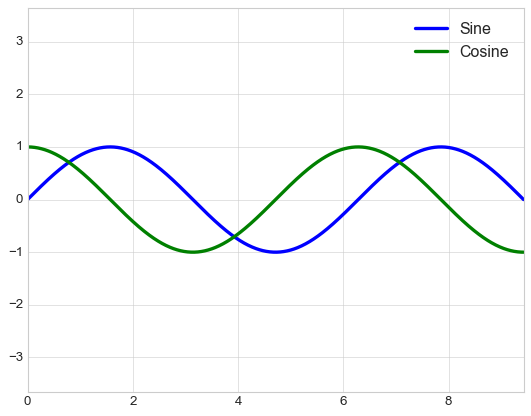

In [90]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple changes we might like to make. First, it's more natural for this data to space the ticks and grid lines in multiples of $\pi$. We can do this by setting a ``MultipleLocator``, which locates ticks at a multiple of the number you provide. For good measure, we'll add both major and minor ticks in multiples of $\pi/4$:

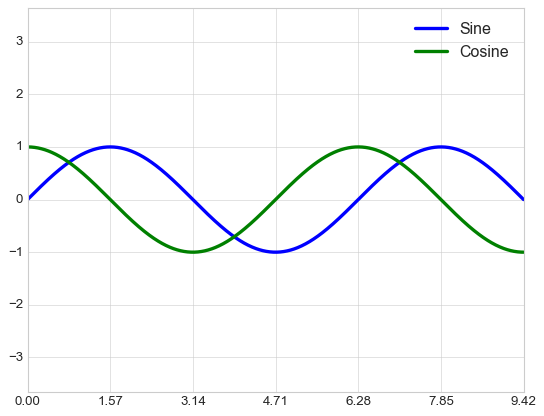

In [91]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this.
To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use ``plt.FuncFormatter``, which accepts a user-defined function giving fine-grained control over the tick outputs:

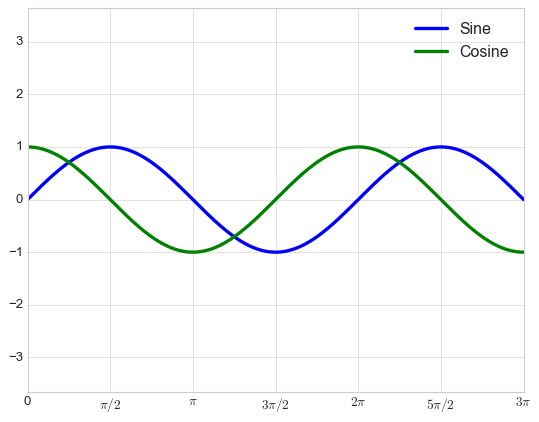

In [92]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, ``"$\pi$"`` is rendered as the Greek character $\pi$.

The ``plt.FuncFormatter()`` offers extremely fine-grained control over the appearance of your plot ticks, and comes in very handy when preparing plots for presentation or publication.

## Summary of Formatters and Locators

We've mentioned a couple of the available formatters and locators.
We'll conclude this section by briefly listing all the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentaion.
Each of the following is available in the ``plt`` namespace:

Locator class        | Description
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Tick locations are fixed
``IndexLocator``     | Locator for index plots (e.g., where x = range(len(y)))
``LinearLocator``    | Evenly spaced ticks from min to max
``LogLocator``       | Logarithmically ticks from min to max
``MultipleLocator``  | Ticks and range are a multiple of base
``MaxNLocator``      | Finds up to a max number of ticks at nice locations
``AutoLocator``      | (Default.) MaxNLocator with simple defaults.
``AutoMinorLocator`` | Locator for minor ticks

Formatter Class       | Description
----------------------|---------------
``NullFormatter``     | No labels on the ticks
``IndexFormatter``    | Set the strings from a list of labels
``FixedFormatter``    | Set the strings manually for the labels
``FuncFormatter``     | User-defined function sets the labels
``FormatStrFormatter``| Use a format string for each value
``ScalarFormatter``   | (Default.) Formatter for scalar values
``LogFormatter``      | Default formatter for log axes

## Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users.
While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

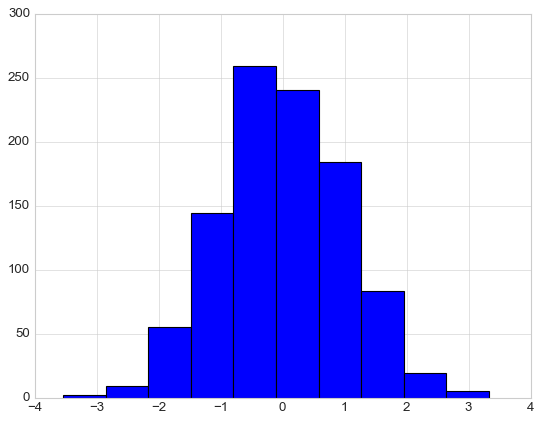

In [93]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

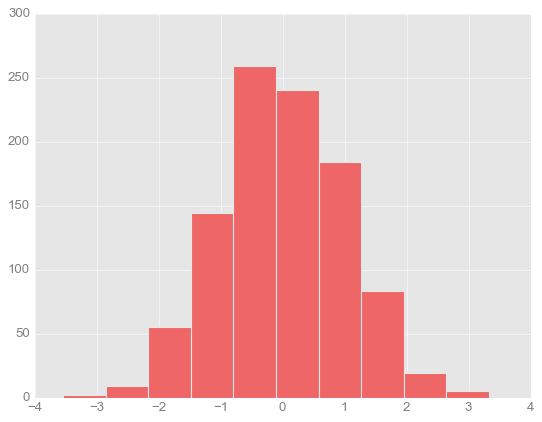

In [94]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: ``rcParams``

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

In [95]:
IPython_default = plt.rcParams.copy()

Now we can use the ``plt.rc`` function to change some of these settings:

In [96]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

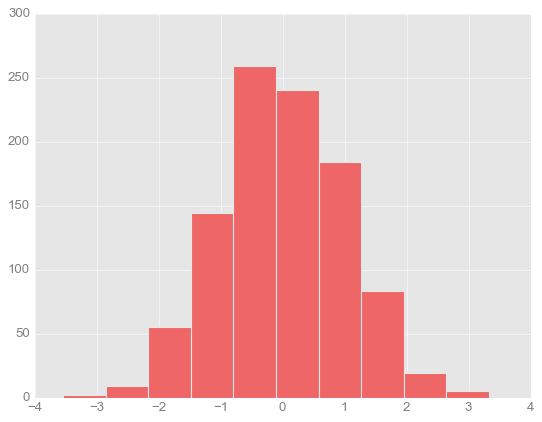

In [97]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters:

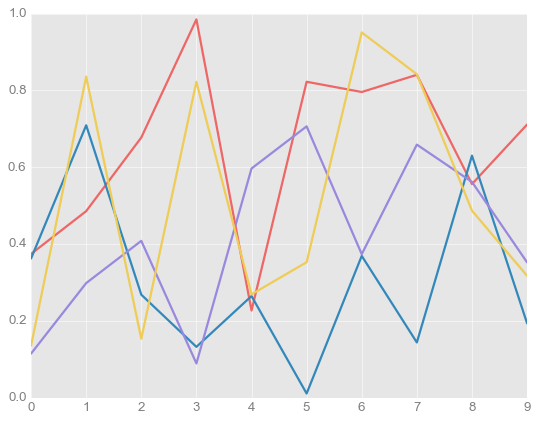

In [98]:
for i in range(4):
    plt.plot(np.random.rand(10))

You can adjust the rc parameters to suit your own tastes!
These settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).

That said, you may prefer to customize Matplotlib using its stylesheets instead.

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient ``style`` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't create your own style, the stylesheets included by default are extremely useful.
The available styles are listed in ``plt.style.available``—here I'll list only the first ten for brevity:

In [99]:
plt.style.available[:10]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette']

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


Let's create a function that will make two basic types of plot:

In [100]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default style

The default style is what we've been seeing so far throughout the book; we'll start with that.
First, let's reset our runtime configuration to the notebook default:

In [101]:
# reset rcParams
plt.rcParams.update(IPython_default);

Now let's see how it looks:

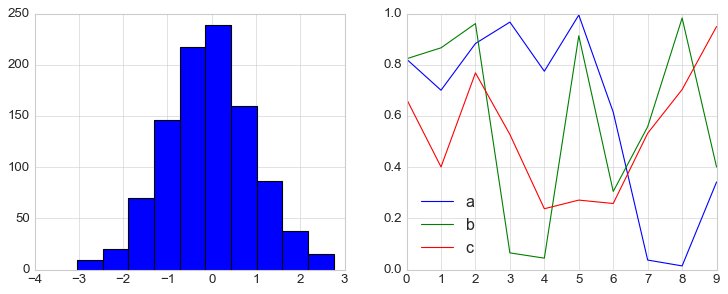

In [102]:
hist_and_lines()

### FiveThiryEight style

The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see here, it is typified by bold colors, thick lines, and transparent axes:

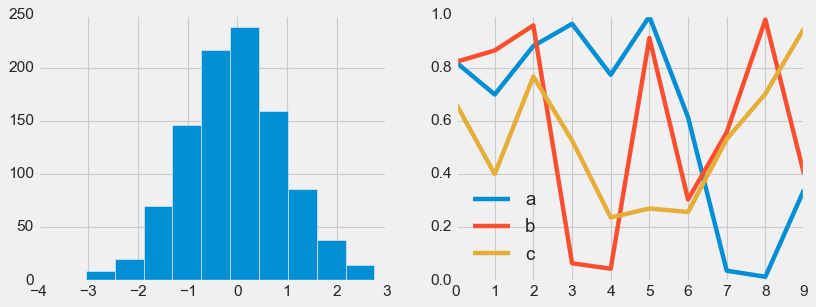

In [103]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

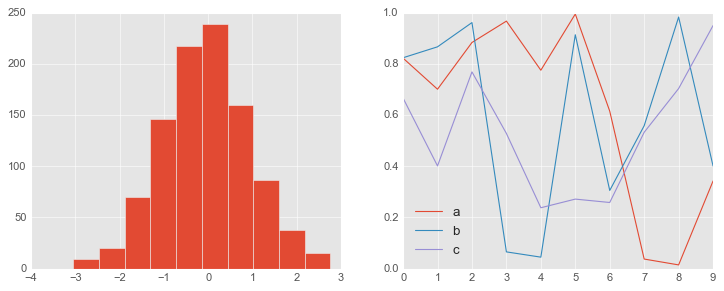

In [104]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers (style bmh)

There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

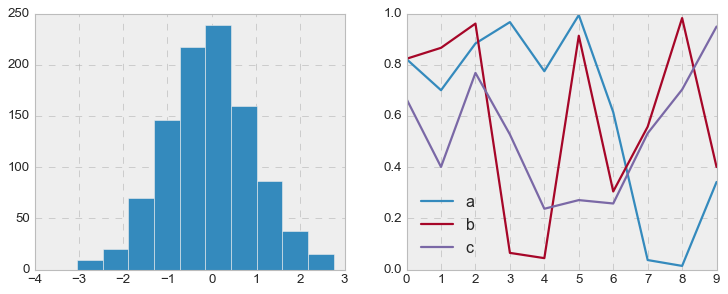

In [105]:
with plt.style.context('bmh'):
    hist_and_lines()

### Seaborn style

Matplotlib also has stylesheets inspired by the Seaborn library (discussed below).
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.
I've found these settings to be very nice.

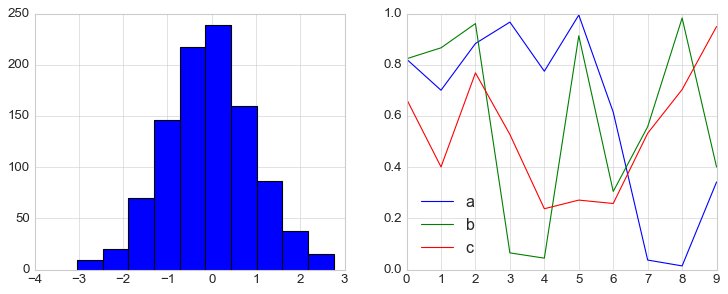

In [106]:
import seaborn
hist_and_lines()

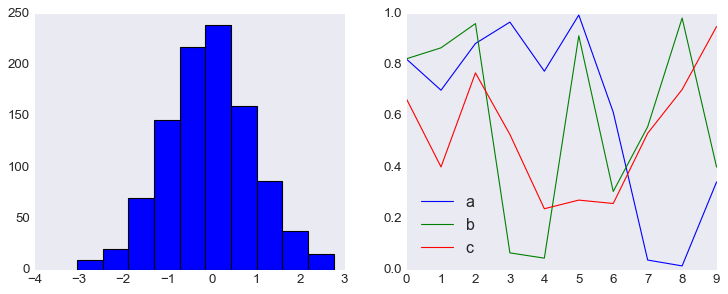

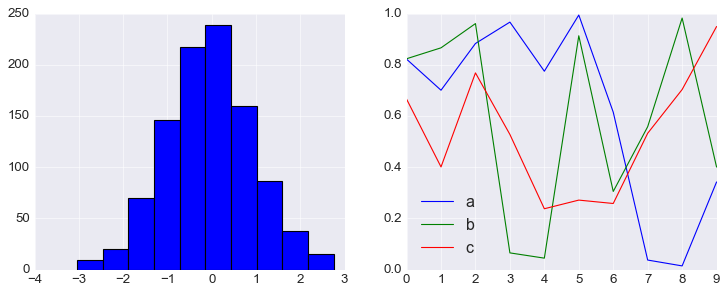

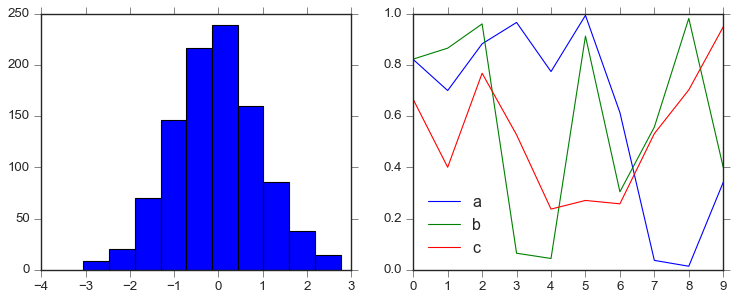

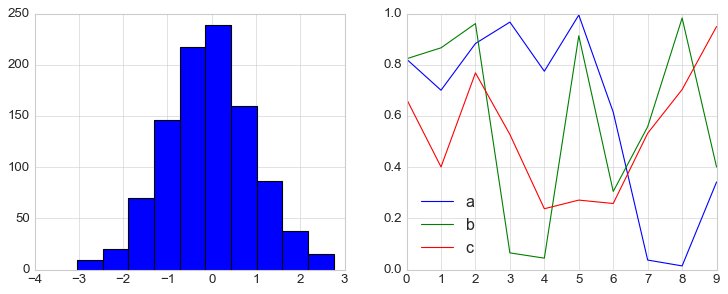

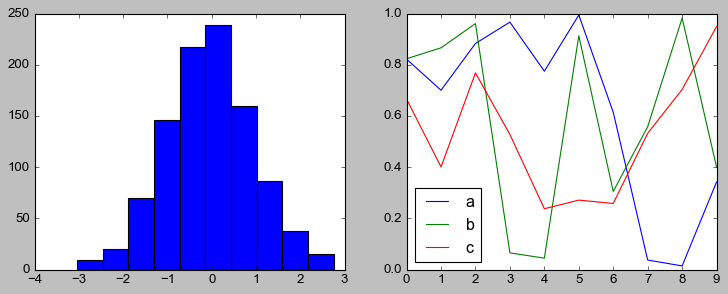

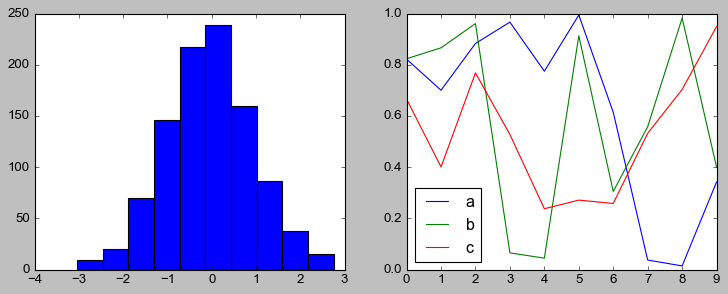

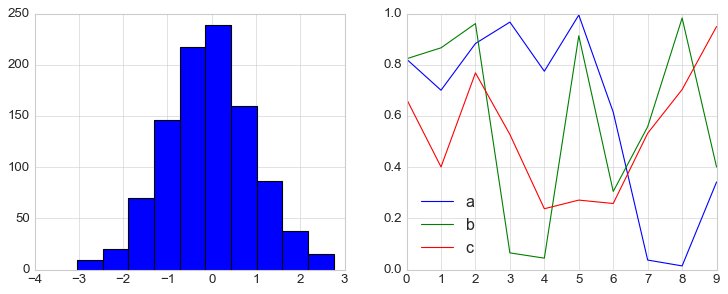

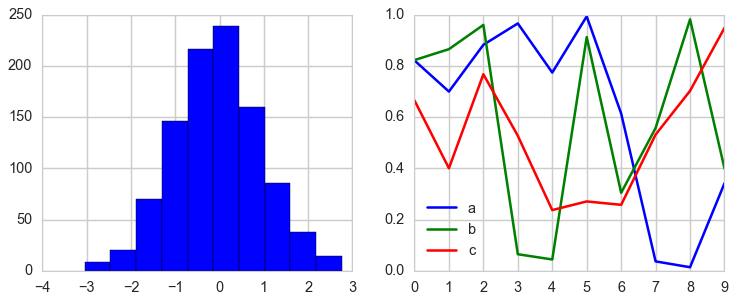

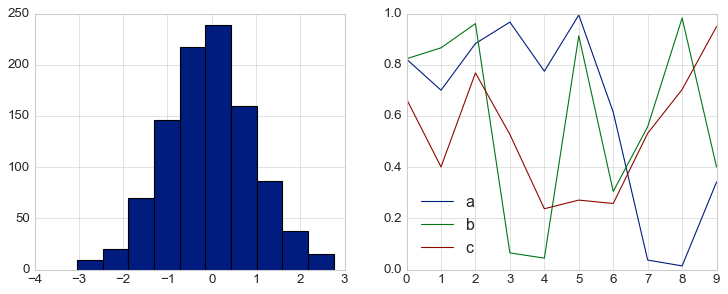

In [107]:
for style in ['seaborn-dark', 'seaborn-darkgrid',
              'seaborn-ticks', 'seaborn-whitegrid',
              'classic', '_classic_test',
              'fast', 'seaborn-talk', 'seaborn-dark-palette']:
    with plt.style.context(style):
        hist_and_lines()

### An even better option:

Follow your hunch that the [documentation likely documents the styles available and shows examples](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)! 

## Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [108]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

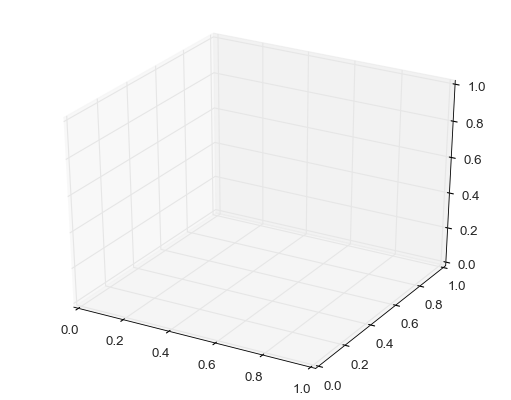

In [109]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

### Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

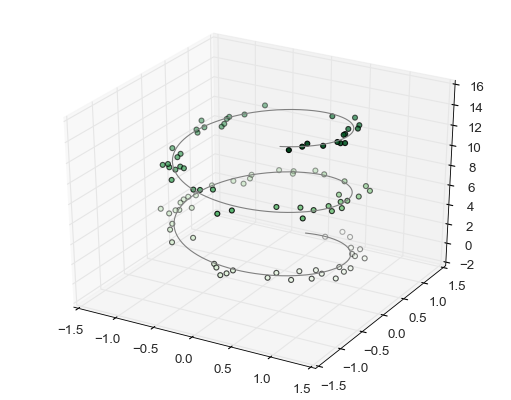

In [110]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

### Three-dimensional Contour Plots

Analogous to the contour plots we explored, ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.
Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [111]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

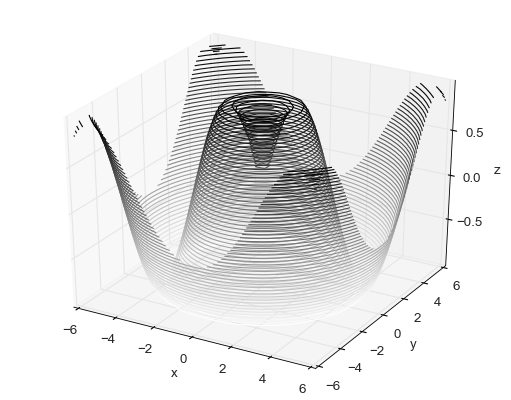

In [112]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

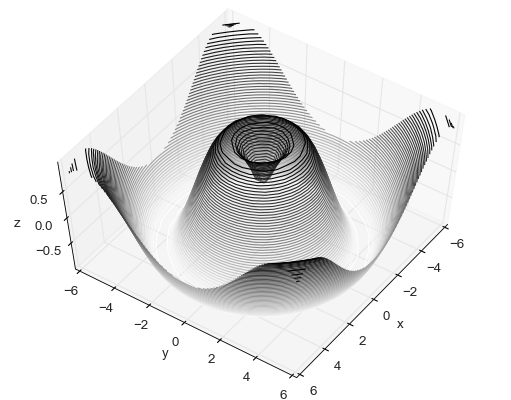

In [113]:
ax.view_init(60, 35)
fig

### Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

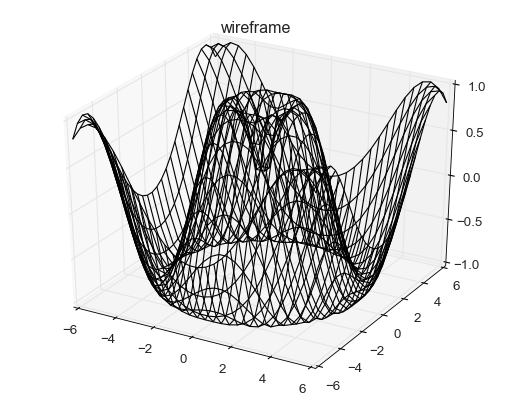

In [114]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

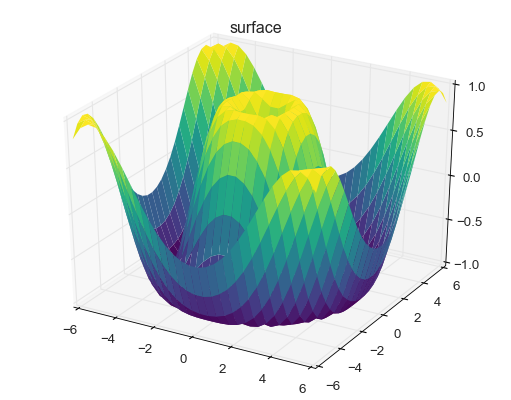

In [115]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

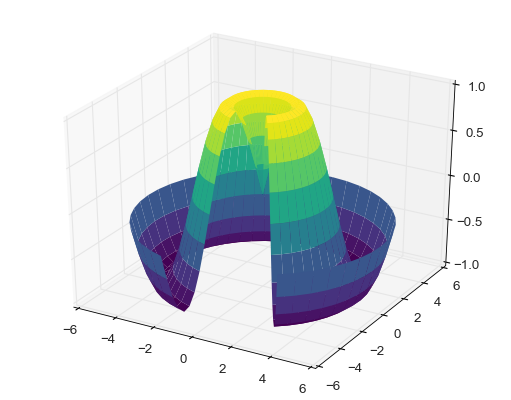

In [116]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

### Surface Triangulations

For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient.
In these situations, the triangulation-based plots can be very useful.
What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [117]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from:

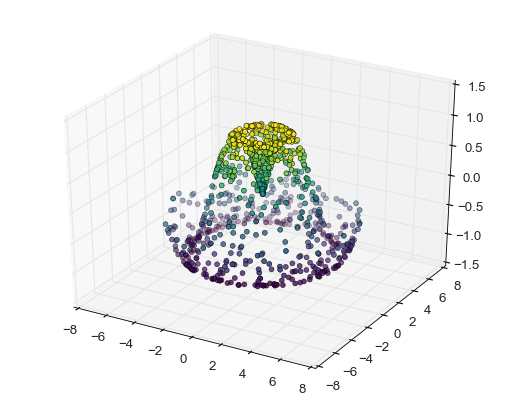

In [118]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

This leaves a lot to be desired.
The function that will help us in this case is ``ax.plot_trisurf``, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

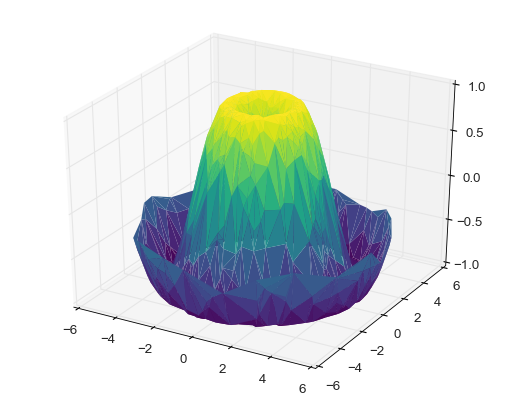

In [119]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots.
For example, it is actually possible to plot a three-dimensional Möbius strip using this, as we'll see next.

### Example: Visualizing a Möbius strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist.
Topologically, it's quite interesting because despite appearances it has only a single side!
Here we will visualize such an object using Matplotlib's three-dimensional tools.
The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

In [120]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the *(x, y, z)* positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [121]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding.
We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [122]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation *within the underlying parametrization*, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.
This can be accomplished as follows:

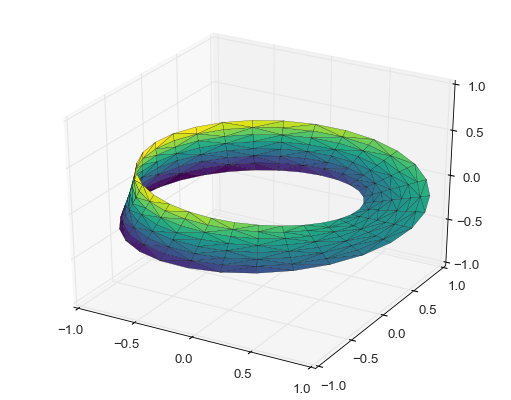

In [123]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

## FYI: Geographic Data with Basemap

We'll skip learning about using maps with your figures (e.g. plotting data e.g. energy use on top of maps), see https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html or other tutorials.

## Visualization with Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed previously, and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

### Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [124]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [125]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

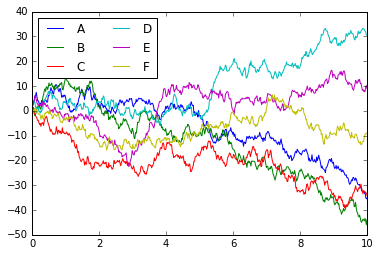

In [126]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [127]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

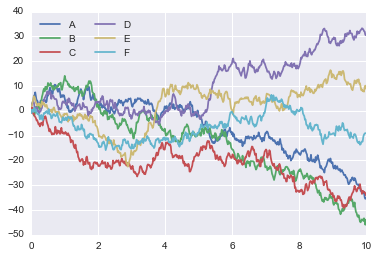

In [128]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

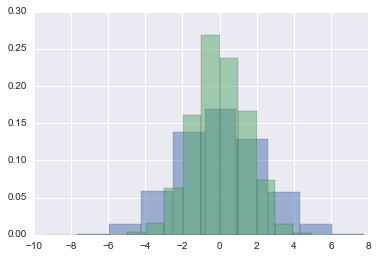

In [129]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

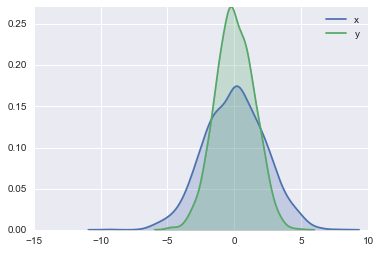

In [130]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``distplot``:

/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


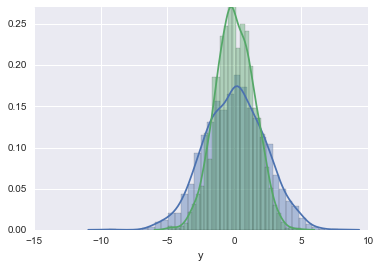

In [131]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

/Users/hbmayes/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


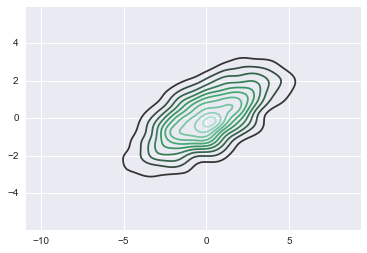

In [132]:
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

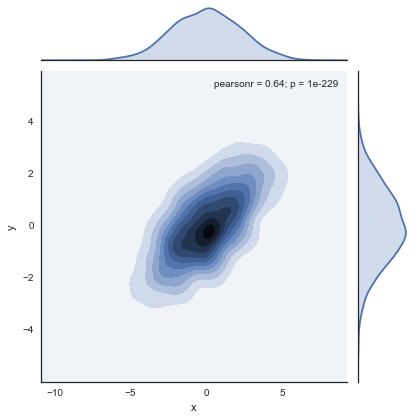

In [133]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


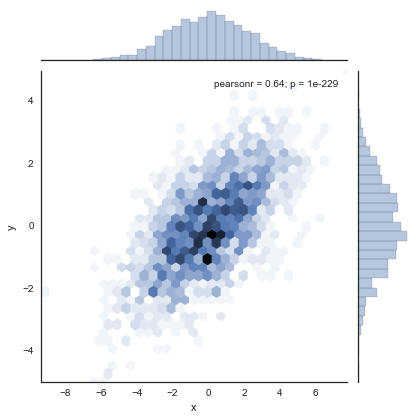

In [134]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [135]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

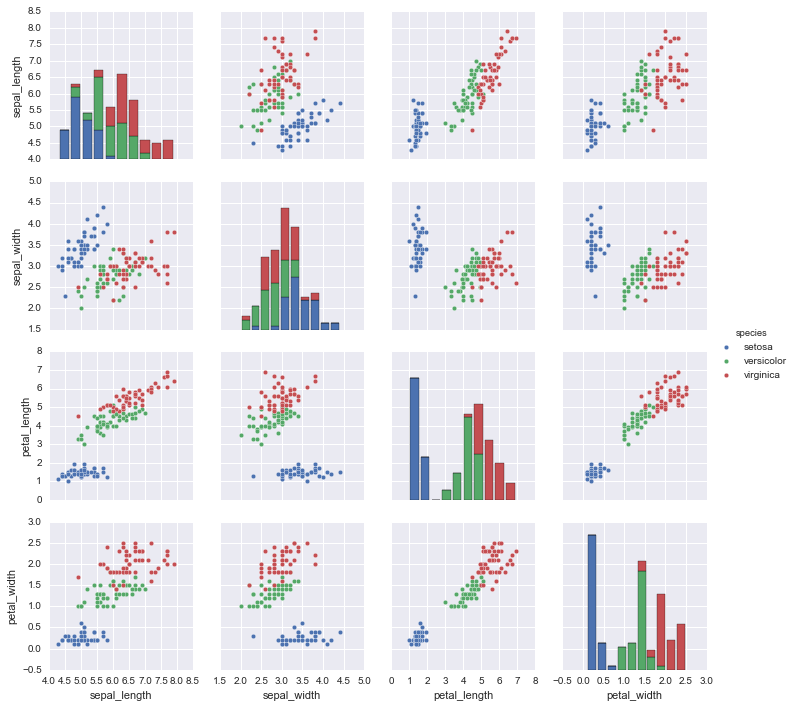

In [136]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [137]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

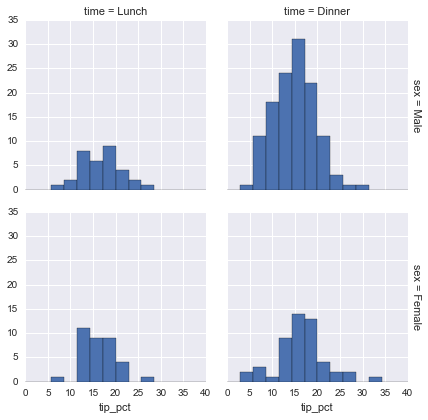

In [138]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

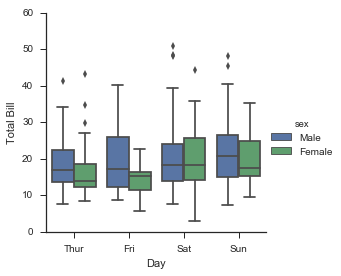

In [139]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


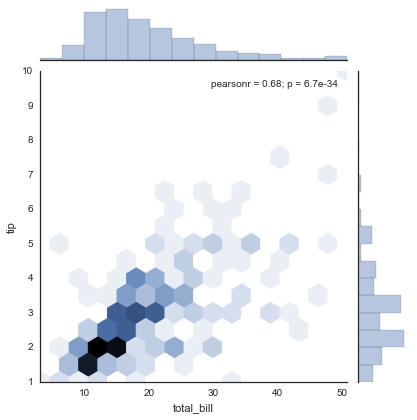

In [140]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hbmayes/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


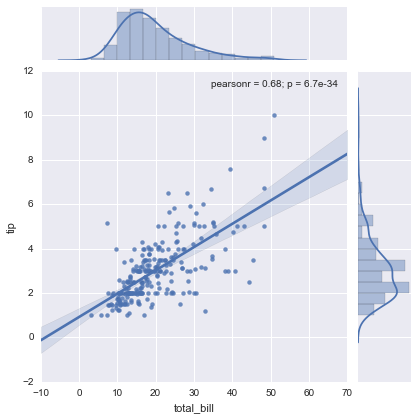

In [141]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using ``sns.factorplot``.

In [142]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

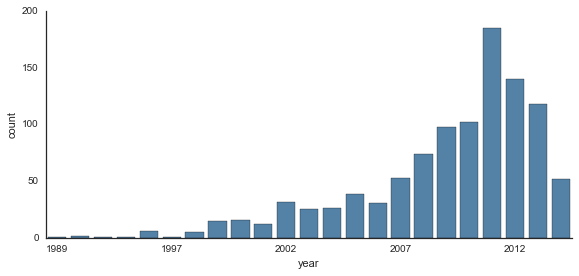

In [143]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

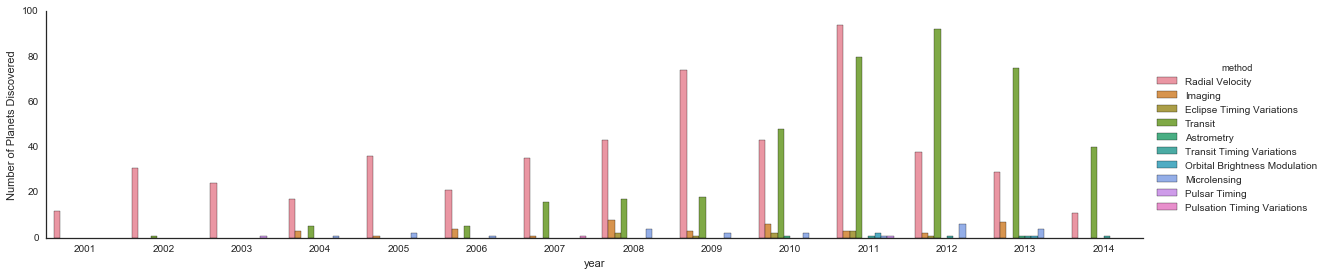

In [144]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).